# Import Requirements

In [4]:
!pip install seaborn sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.9 MB 7.1 MB/s             
     |████████████████████████████████| 306 kB 6.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=5e492aab27540cdd03e1fe3a581fcf79b164e79d015b899bddfcc1eb36132ae0
  Stored in directory: /home/kyralm/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from math import *
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from sklearn import metrics

2021-11-16 18:02:09.051522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-16 18:02:09.051537: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import Dataset

In [2]:
path = 'dataset'
all_files = glob.glob(path+'/*.csv')
df = pd.concat(pd.read_csv(f, index_col=['filename', 'frame']) for f in all_files)

In [3]:
cols = df.columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
frame,1006850.0,149.163353,86.176074,1.0,75.00,149.00,224.000,300.00
confidence,1006850.0,0.901667,0.146482,0.0,0.88,0.93,0.980,0.98
face_id,1006850.0,0.000000,0.000000,0.0,0.00,0.00,0.000,0.00
x_0,1006850.0,809.856749,217.602138,-1.1,711.80,841.60,946.700,1792.80
x_1,1006850.0,808.158277,216.833053,-1.7,709.50,840.10,946.400,1795.00
x_2,1006850.0,808.622990,215.891128,-0.9,711.10,840.60,947.500,1795.60
x_3,1006850.0,811.561491,214.204174,0.0,714.80,842.90,950.100,1797.30
x_4,1006850.0,818.777996,211.085332,0.0,723.50,848.10,955.100,1805.00
x_5,1006850.0,830.783987,207.420750,0.0,741.90,857.10,963.600,1817.70
x_6,1006850.0,846.098002,204.163776,0.0,765.50,868.00,974.900,1835.90


<AxesSubplot:>

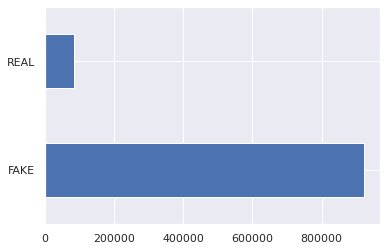

In [20]:
df['label'].value_counts().plot(kind='barh')

In [4]:
# need to bring in some more real data
# created on chosen csv using following command:
# grep -v ",FAKE" file_0.csv > real_0.csv
# fastest way to alter datafile
real_files = glob.glob(path+'/real/real_*.csv')
for f in real_files:
    df = pd.concat([df,pd.read_csv(f, index_col=['filename', 'frame'])])
df.shape

(1779956, 139)

<AxesSubplot:>

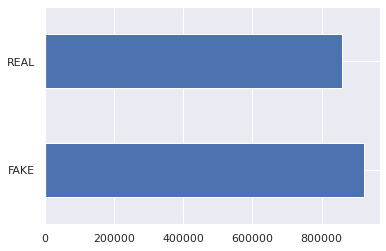

In [5]:
df['label'].value_counts().plot(kind='barh')

In [6]:
#sort dataset
df = df.sort_values(by=['filename','frame'])

In [9]:
df.to_csv('cleaned_data.csv', header=cols)

In [4]:
### Read in Dataframe
df = pd.read_csv('cleaned_data.csv', index_col=['filename', 'frame'])
df.isna().any().any()


False

In [5]:
df

confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aaaoqepxnf.mp4 1            0.93        0  881.2  880.9  883.3  887.6  893.6   
               2            0.93        0  881.4  880.9  883.3  887.6  893.7   
               3            0.98        0  881.5  880.9  883.3  887.8  893.8   
               4            0.98        0  881.7  881.2  883.6  888.0  894.0   
               5            0.98        0  882.0  881.4  883.9  888.3  894.3   
...                          ...      ...    ...    ...    ...    ...    ...   
zzpbsapyyf.mp4 296          0.88        0  719.7  719.3  720.3  723.5  729.4   
               297          0.93        0  719.5  719.2  720.2  723.3  729.2   
               298          0.93        0  719.6  719.2  720.2  723.3  729.1   
               299          0.93        0  719.5  719.1  720.1  723.2  729.0   
               300          0.93        0  719.4  718.9  719.9  723.1  728.9   

                        x_5    x_6    x_7  ...   y_59   y_60   y_61   y_62  \
filename       frame                       ...                               
aaaoqepxnf.mp4 1      902.5  914.0  930.3  ...  423.5  405.5  397.7  398.1   
               2      902.7  914.3  930.6  ...  425.2  405.6  397.4  397.8   
               3      902.6  914.1  930.3  ...  425.7  405.9  397.5  397.8   
               4      902.8  914.3  930.5  ...  425.8  405.9  397.4  397.8   
               5      903.1  914.6  930.8  ...  426.2  406.8  398.5  398.8   
...                     ...    ...    ...  ...    ...    ...    ...    ...   
zzpbsapyyf.mp4 296    739.4  752.6  767.9  ...  186.9  181.0  172.1  171.7   
               297    739.0  752.2  767.6  ...  187.0  181.1  172.1  171.7   
               298    738.8  752.0  767.3  ...  186.7  181.0  172.0  171.7   
               299    738.7  751.9  767.2  ...  187.5  181.4  172.3  171.9   
               300    738.8  752.1  767.6  ...  188.0  181.8  172.6  172.2   

                       y_63   y_64   y_65   y_66   y_67  label  
filename       frame                                            
aaaoqepxnf.mp4 1      397.9  405.7  420.1  421.0  419.9   FAKE  
               2      397.6  406.0  422.8  423.7  422.6   FAKE  
               3      397.7  406.3  423.3  424.1  423.0   FAKE  
               4      397.7  406.4  423.3  424.1  423.0   FAKE  
               5      398.7  407.2  423.3  424.1  423.0   FAKE  
...                     ...    ...    ...    ...    ...    ...  
zzpbsapyyf.mp4 296    171.3  179.0  180.8  181.3  181.4   REAL  
               297    171.3  179.1  180.9  181.5  181.5   REAL  
               298    171.2  179.0  180.5  181.1  181.1   REAL  
               299    171.4  179.5  181.5  182.1  182.2   REAL  
               300    171.8  180.1  182.0  182.6  182.6   REAL  

[1779956 rows x 139 columns]

## Get Euclidean Distance

In [17]:
#try on first file
test = df[df.index.get_level_values('filename').str.startswith('zzpbsapyyf.mp4')]
# get average distance between frames
#frame 2->300
# landmark points (x_0, y_0) -> (x_67, y_67)
points = list(zip(test.x_0, test.y_0))
d = np.diff(points, axis=0)
x_0_real = np.sqrt((d ** 2).sum(axis=1))

In [20]:
test = df[df.index.get_level_values('filename').str.startswith('aaaoqepxnf.mp4')]
points = list(zip(test.x_0, test.y_0))
d = np.diff(points, axis=0)
x_0_fake = np.sqrt((d ** 2).sum(axis=1))

Text(0, 0.5, 'Euclidian Distance (mm)')

<Figure size 2160x1440 with 0 Axes>

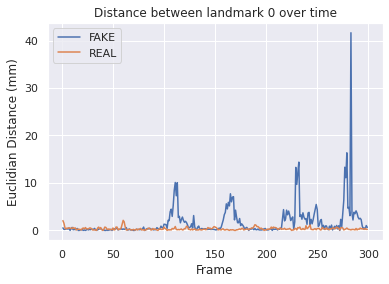

In [21]:
#sns.lineplot(x=range(1,300), y=x_0_real, label='REAL', markers=True)
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(x=range(1,300), y=x_0_fake, label='FAKE', markers=True)
ax1 = sns.lineplot(x=range(1,300), y=x_0_real, label='REAL')
plt.title('Distance between landmark 0 over time')
plt.xlabel('Frame')
plt.ylabel('Euclidian Distance (mm)')


### Create CSV of distance

In [22]:
# group dataframe into real and fake videos
df_fake = df[df.label=='FAKE']
df_real = df[df.label=='REAL']

In [35]:
for i in range(0,68):
    print(i)
    x = df_real.groupby('filename')['x_{}'.format(i)].diff()
    y = df_real.groupby('filename')['y_{}'.format(i)].diff()
    df_real['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)
df_real

0


/tmp/ipykernel_22722/592260839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aagumdmtjk.mp4 1            0.98        0  952.0  951.3  951.9  953.6  957.8   
               2            0.98        0  952.9  952.2  952.7  954.3  958.4   
               3            0.98        0  953.0  952.2  952.7  954.3  958.2   
               4            0.98        0  953.2  952.2  952.5  953.9  957.8   
               5            0.98        0  953.0  952.1  952.3  953.6  957.4   
...                          ...      ...    ...    ...    ...    ...    ...   
zzpbsapyyf.mp4 296          0.88        0  719.7  719.3  720.3  723.5  729.4   
               297          0.93        0  719.5  719.2  720.2  723.3  729.2   
               298          0.93        0  719.6  719.2  720.2  723.3  729.1   
               299          0.93        0  719.5  719.1  720.1  723.2  729.0   
               300          0.93        0  719.4  718.9  719.9  723.1  728.9   

                        x_5    x_6    x_7  ...  landmark_58  landmark_59  \
filename       frame                       ...                             
aagumdmtjk.mp4 1      965.2  974.2  985.0  ...          NaN          NaN   
               2      965.8  974.9  985.6  ...     0.632456     0.608276   
               3      965.4  974.2  984.9  ...     0.538516     0.316228   
               4      964.8  973.6  984.4  ...     0.447214     0.412311   
               5      964.4  973.2  984.2  ...     0.632456     0.721110   
...                     ...    ...    ...  ...          ...          ...   
zzpbsapyyf.mp4 296    739.4  752.6  767.9  ...     0.500000     0.583095   
               297    739.0  752.2  767.6  ...     0.200000     0.100000   
               298    738.8  752.0  767.3  ...     0.400000     0.316228   
               299    738.7  751.9  767.2  ...     1.004988     0.806226   
               300    738.8  752.1  767.6  ...     0.538516     0.538516   

                      landmark_60  landmark_61  landmark_62  landmark_63  \
filename       frame                                                       
aagumdmtjk.mp4 1              NaN          NaN          NaN          NaN   
               2         0.447214     0.300000     0.400000     0.608276   
               3         0.141421     0.300000     0.500000     0.700000   
               4         0.447214     0.316228     0.223607     0.100000   
               5         0.424264     0.412311     0.300000     0.100000   
...                           ...          ...          ...          ...   
zzpbsapyyf.mp4 296       0.728011     0.854400     0.806226     0.800000   
               297       0.100000     0.000000     0.000000     0.100000   
               298       0.100000     0.100000     0.000000     0.141421   
               299       0.412311     0.300000     0.223607     0.282843   
               300       0.500000     0.360555     0.300000     0.412311   

                      landmark_64  landmark_65  landmark_66  landmark_67  
filename       frame                                                      
aagumdmtjk.mp4 1              NaN          NaN          NaN          NaN  
               2         0.728011     0.781025     0.640312     0.632456  
               3         1.000000     0.854400     0.538516     0.316228  
               4         0.223607     0.400000     0.447214     0.500000  
               5         0.223607     0.141421     0.360555     0.583095  
...                           ...          ...          ...          ...  
zzpbsapyyf.mp4 296       0.608276     0.412311     0.412311     0.500000  
               297       0.141421     0.141421     0.200000     0.100000  
               298       0.100000     0.412311     0.400000     0.412311  
               299       0.509902     1.019804     1.004988     1.104536  
               300       0.632456     0.509902     0.509902     0.412311  

[857882 rows x 207 columns]

In [36]:
df_real.to_csv('cleaned_data_real.csv', header=df_real.columns, index=['filename','frame'])

In [37]:
for i in range(0,68):
    #points = ['x_{}'.format(i), 'y_{}'.format(i)]
    #df_fake['landmark_{}'.format(i)] = df_fake[points].values.tolist()
    #df_fake = df_fake.drop([points[0], points[1]], axis=1)
    x = df_fake.groupby('filename')['x_{}'.format(i)].diff()
    y = df_fake.groupby('filename')['y_{}'.format(i)].diff()
    df_fake['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)
df_fake

/tmp/ipykernel_22722/3576188904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)


confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aaaoqepxnf.mp4 1            0.93        0  881.2  880.9  883.3  887.6  893.6   
               2            0.93        0  881.4  880.9  883.3  887.6  893.7   
               3            0.98        0  881.5  880.9  883.3  887.8  893.8   
               4            0.98        0  881.7  881.2  883.6  888.0  894.0   
               5            0.98        0  882.0  881.4  883.9  888.3  894.3   
...                          ...      ...    ...    ...    ...    ...    ...   
zzeircwkbh.mp4 295          0.88        0  987.7  984.3  983.2  983.6  986.5   
               296          0.88        0  986.9  983.7  982.7  983.1  986.1   
               297          0.88        0  987.3  983.9  982.6  982.7  985.5   
               298          0.88        0  986.7  983.2  981.8  982.0  985.0   
               299          0.88        0  986.3  982.9  981.6  981.7  984.5   

                        x_5     x_6     x_7  ...  landmark_58  landmark_59  \
filename       frame                         ...                             
aaaoqepxnf.mp4 1      902.5   914.0   930.3  ...          NaN          NaN   
               2      902.7   914.3   930.6  ...     2.473863     1.746425   
               3      902.6   914.1   930.3  ...     0.608276     0.509902   
               4      902.8   914.3   930.5  ...     0.200000     0.100000   
               5      903.1   914.6   930.8  ...     0.412311     0.640312   
...                     ...     ...     ...  ...          ...          ...   
zzeircwkbh.mp4 295    994.0  1006.0  1023.7  ...     1.726268     1.360147   
               296    993.8  1005.9  1023.6  ...     0.300000     0.360555   
               297    993.2  1005.4  1023.1  ...     1.029563     1.000000   
               298    992.8  1005.1  1022.7  ...     0.583095     0.360555   
               299    991.9  1004.0  1021.5  ...     0.728011     0.632456   

                      landmark_60  landmark_61  landmark_62  landmark_63  \
filename       frame                                                       
aaaoqepxnf.mp4 1              NaN          NaN          NaN          NaN   
               2         0.608276     0.583095     0.300000     0.583095   
               3         0.360555     0.141421     0.100000     0.141421   
               4         0.100000     0.141421     0.100000     0.000000   
               5         0.984886     1.140175     1.044031     1.044031   
...                           ...          ...          ...          ...   
zzeircwkbh.mp4 295       0.984886     1.612452     1.702939     2.002498   
               296       0.608276     1.204159     1.204159     1.236932   
               297       1.000000     1.421267     1.500000     1.627882   
               298       0.500000     0.921954     1.081665     1.081665   
               299       0.565685     0.854400     1.044031     1.204159   

                      landmark_64  landmark_65  landmark_66  landmark_67  
filename       frame                                                      
aaaoqepxnf.mp4 1              NaN          NaN          NaN          NaN  
               2         0.424264     2.716616     2.716616     2.765863  
               3         0.316228     0.509902     0.400000     0.412311  
               4         0.141421     0.100000     0.100000     0.000000  
               5         0.806226     0.200000     0.300000     0.300000  
...                           ...          ...          ...          ...  
zzeircwkbh.mp4 295       1.900000     2.102380     1.811077     1.612452  
               296       0.921954     0.141421     0.100000     0.223607  
               297       1.140175     1.166190     1.029563     0.943398  
               298       0.921954     0.948683     0.761577     0.583095  
               299       1.236932     1.204159     1.140175     0.984886  

[

In [38]:
df_fake.to_csv('cleaned_data_fake.csv', header=df_fake.columns, index=['filename','frame'])

In [39]:
df_fake = pd.read_csv('cleaned_data_fake.csv', header=0, index_col=['filename', 'frame'])
df_real = pd.read_csv('cleaned_data_real.csv', header=0, index_col=['filename', 'frame'])


# Explore Data 
## Creating Graphs

### Mean and Meidan of Chosen Landmark Distance between Frames

<Figure size 2160x1440 with 0 Axes>

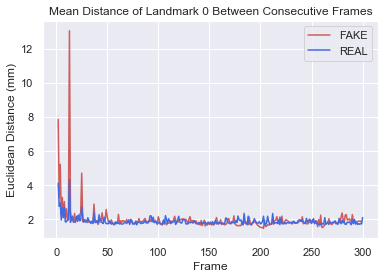

In [114]:
i = 0
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=df_fake.groupby('frame').mean()[1:-1:],x=range(2,len(df_fake.groupby('frame').count())), y='landmark_{}'.format(i), label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=df_real.groupby('frame').mean()[1:-1:],x=range(2,len(df_real.groupby('frame').count())), y='landmark_{}'.format(i), label='REAL', color='royalblue')
plt.title('Mean Distance of Landmark {} Between Consecutive Frames'.format(i))
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/mean_distance_frames_landmark_{}.png".format(i), dpi=300)

<Figure size 2160x1440 with 0 Axes>

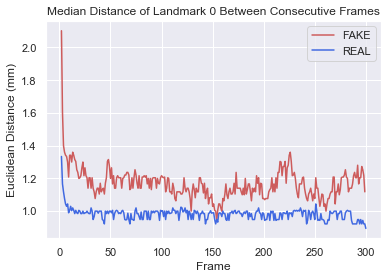

In [11]:
i = 0
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=df_fake.groupby('frame').median()[1:-1:],x=range(2,len(df_fake.groupby('frame').count())), y='landmark_{}'.format(i), label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=df_real.groupby('frame').median()[1:-1:],x=range(2,len(df_real.groupby('frame').count())), y='landmark_{}'.format(i), label='REAL', color='royalblue')
plt.title('Median Distance of Landmark {} Between Consecutive Frames'.format(i))
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/median_distance_frames_landmark_{}.png".format(i), dpi=300)


### Distance averaged aross all landmarks per frame 


In [41]:
# create array of all the landmark columns
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]

In [28]:
sns.set_style("darkgrid")

<Figure size 2160x1440 with 0 Axes>

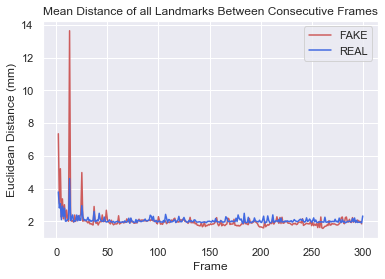

In [112]:

# want to average the distance of each landmark, group by frame 
# y = average distance of all landmarks, x = frame
d_fake = df_fake.groupby('frame').mean()[landmark_cols].mean(axis=1)[1:-1:]
d_real = df_real.groupby('frame').mean()[landmark_cols].mean(axis=1)[1:-1:]

plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=d_fake, label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=d_real, label='REAL', color='royalblue')

plt.title('Mean Distance of all Landmarks Between Consecutive Frames')
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/mean_distance_frames_all_landmark.png", dpi=300)


<Figure size 2160x1440 with 0 Axes>

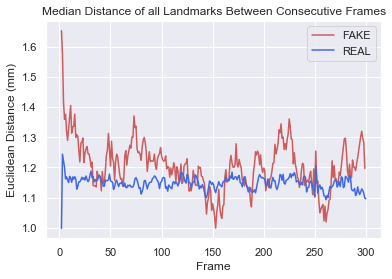

In [295]:
# create array of all the landmark columns
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]
# want to average the distance of each landmark, group by frame 
# y = average distance of all landmarks, x = frame
d_fake = df_fake.groupby('frame').median()[landmark_cols].mean(axis=1)[1:-1:]
d_real = df_real.groupby('frame').median()[landmark_cols].mean(axis=1)[1:-1:]

plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=d_fake, label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=d_real, label='REAL', color='royalblue')
plt.title('Median Distance of all Landmarks Between Consecutive Frames')
plt.xlabel('Frame')
plt.ylabel('Euclidean Distance (mm)')
plt.savefig("figures/median_distance_frames_all_landmark.png", dpi=300)


### including confidence bars / subplots

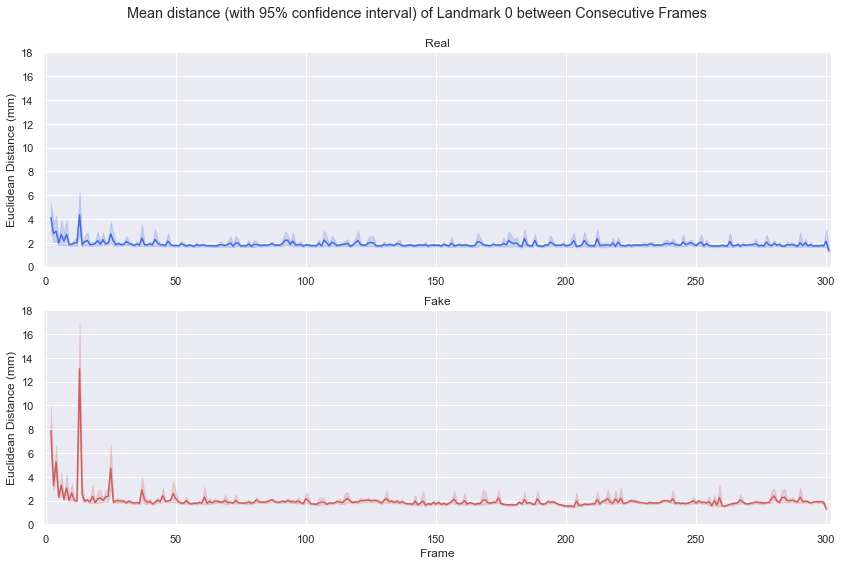

<Figure size 2160x3600 with 0 Axes>

In [293]:
# PER LANDMARK
i=0
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

sns.lineplot(data=df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:], x='frame', y='landmark_{}'.format(i), ax = axes[0], color='royalblue')
sns.lineplot(data=df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:], x='frame', y='landmark_{}'.format(i), ax = axes[1], color='indianred')
axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
fig.suptitle("Mean distance (with 95% confidence interval) of Landmark {} between Consecutive Frames".format(i))
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_mean_landmark_{}.png".format(i), dpi=100)

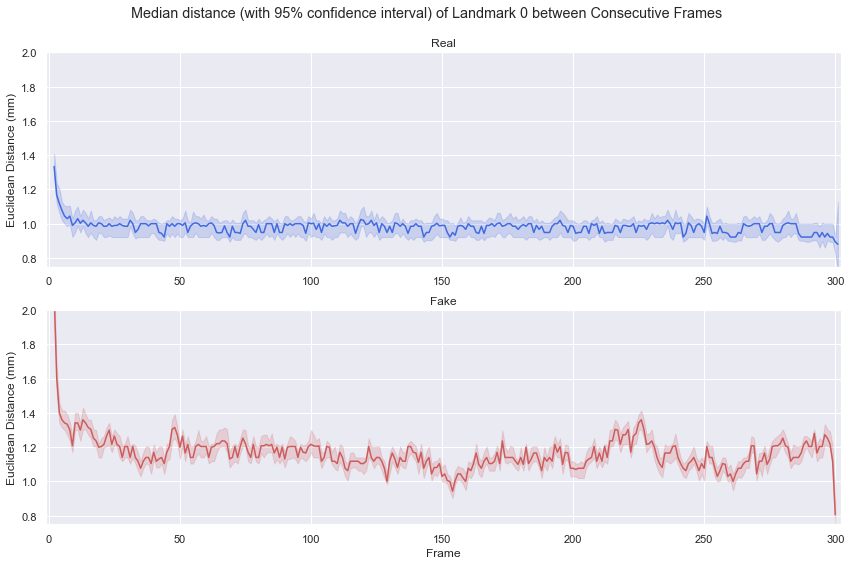

<Figure size 2160x3600 with 0 Axes>

In [305]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]
d_real = df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]

sns.lineplot(data=d_real, x='frame', y='landmark_0', ax = axes[0], color='royalblue', estimator=np.median, markers=True)
sns.lineplot(data=d_fake, x='frame', y='landmark_0', ax = axes[1], color='indianred', estimator=np.median)

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Euclidean Distance (mm)", ylim=(0.75,2), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Euclidean Distance (mm)", ylim=(0.75,2), xlim=(-1,302))

fig.suptitle("Median distance (with 95% confidence interval) of Landmark 0 between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_median_landmark_0.png", dpi=100)

<Figure size 2160x1440 with 0 Axes>

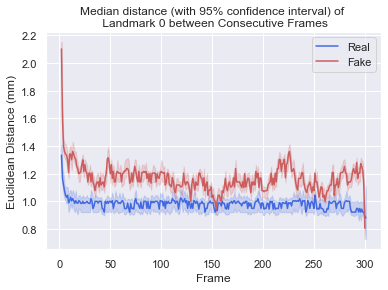

In [307]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()

d_fake = df_fake.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]
d_real = df_real.reset_index(inplace=False)[['frame']+landmark_cols][1:-1:]

ax = sns.lineplot(data=d_real, x='frame', y='landmark_0', color='royalblue', estimator=np.median, label='Real', markers=True)
ax1 = sns.lineplot(data=d_fake, x='frame', y='landmark_0', color='indianred', estimator=np.median, label='Fake')

plt.xlabel("Frame")
plt.ylabel("Euclidean Distance (mm)")
plt.ylim=(0.75,2)
plt.xlim=(-1,302)
plt.title("Median distance (with 95% confidence interval) of \n Landmark 0 between Consecutive Frames")
plt.savefig("figures/median_landmark_0.png", dpi=300)
plt.show()

### averaged over all landmarks

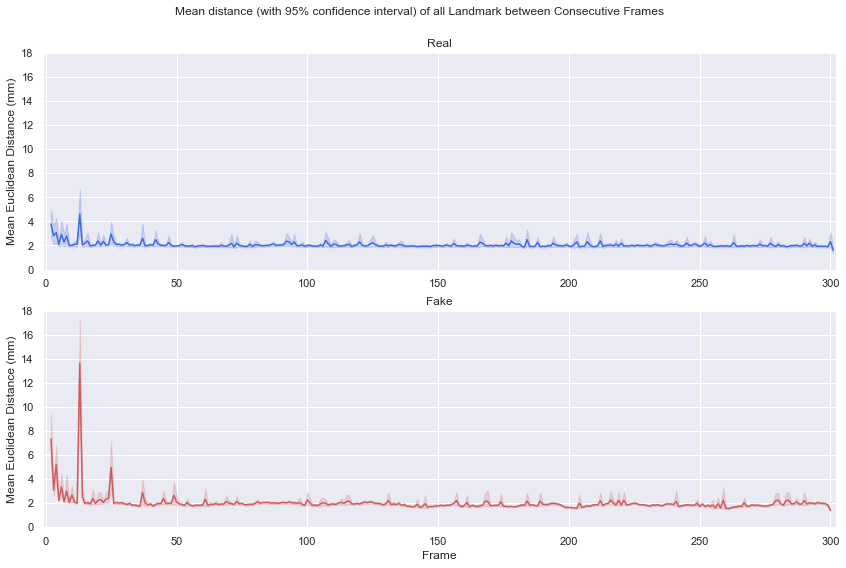

<Figure size 2160x3600 with 0 Axes>

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake[landmark_cols].mean(axis=1).reset_index(inplace=False).dropna()
d_real = df_real[landmark_cols].mean(axis=1).reset_index(inplace=False).dropna()

ax = sns.lineplot(data=d_real, x='frame', y=0, color='royalblue',  markers=True, ax = axes[0])
ax1 = sns.lineplot(data=d_fake, x='frame', y=0, color='indianred', estimator=np.mean, ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Mean Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Mean Euclidean Distance (mm)", ylim=(0,18), xlim=(-1,302))
fig.suptitle("Mean distance (with 95% confidence interval) of all Landmark between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_mean_all_landmark.png", dpi=300)

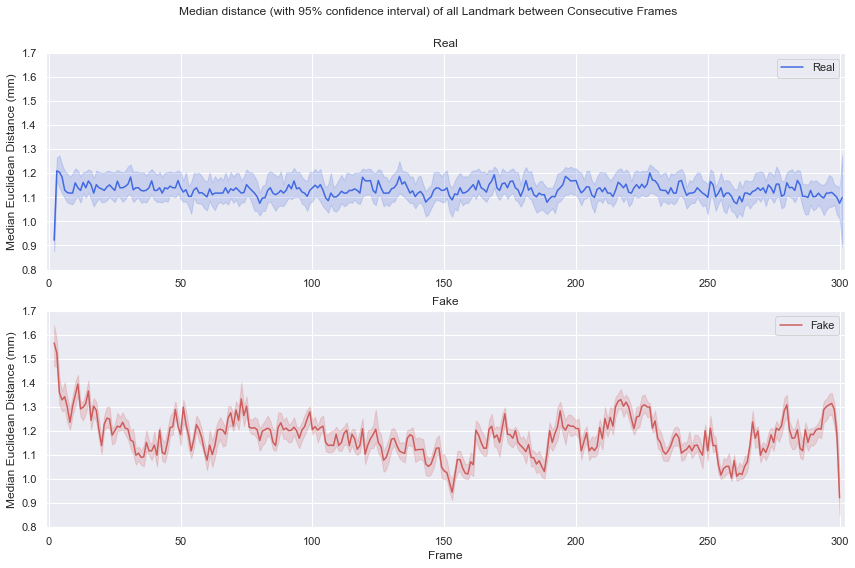

<Figure size 2160x3600 with 0 Axes>

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

d_fake = df_fake[landmark_cols].median(axis=1).reset_index(inplace=False).dropna()
d_real = df_real[landmark_cols].median(axis=1).reset_index(inplace=False).dropna()

ax = sns.lineplot(data=d_real, x='frame', y=0, color='royalblue', estimator=np.median,label='Real', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=d_fake, x='frame', y=0, color='indianred', estimator=np.median, label='Fake', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Frame", ylabel="Median Euclidean Distance (mm)",ylim=(0.8, 1.7), xlim=(-1,302))
axes[0].set(xlabel=None, ylabel="Median Euclidean Distance (mm)",ylim=(0.8, 1.7), xlim=(-1,302))
fig.suptitle("Median distance (with 95% confidence interval) of all Landmark between Consecutive Frames")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/subplot_median_all_landmark.png", dpi=300)

In [132]:
df_fake[landmark_cols].min(axis=1).reset_index(inplace=False).dropna().groupby()

,filename,frame,0
1,aaaoqepxnf.mp4,2,0.000000
2,aaaoqepxnf.mp4,3,0.000000
3,aaaoqepxnf.mp4,4,0.000000
4,aaaoqepxnf.mp4,5,0.100000
5,aaaoqepxnf.mp4,6,0.000000
6,aaaoqepxnf.mp4,7,0.000000
7,aaaoqepxnf.mp4,8,0.316228
8,aaaoqepxnf.mp4,9,0.000000
9,aaaoqepxnf.mp4,10,0.100000
10,aaaoqepxnf.mp4,11,0.100000


## Plots per landmark

Have to convert table to

| landmark | filename 1                      |   ...    |   
|----------|---------------------------------|----------|
|landmark_0| avg(frames) for file1.landmark_0|          |
|landmark_1|...                              |          | 


In [5]:
d_fake = df_fake[landmark_cols]
#rename from 'landmark_0' to just '0' so it sorts right
d_fake.columns = [i for i in range(0,68)]
d_fake.columns.name = 'landmarks'
s_fake = d_fake.stack()
s_fake.name = 'value'
s_fake = s_fake.reset_index()

In [6]:
d_real = df_real[landmark_cols]
#rename from 'landmark_0' to just '0' so it sorts right
d_real.columns = [i for i in range(0,68)]
d_real.columns.name = 'landmarks'
s_real = d_real.stack()
s_real.name = 'value'
s_real = s_real.reset_index()


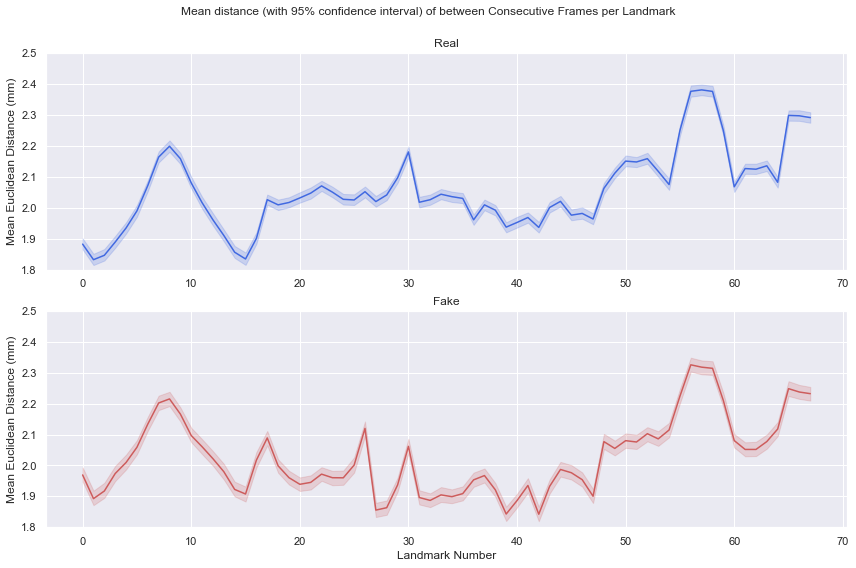

<Figure size 2160x3600 with 0 Axes>

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

ax = sns.lineplot(data=s_real, x='landmarks', y='value', color='royalblue', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', color='indianred', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Landmark Number", ylabel="Mean Euclidean Distance (mm)", ylim=(1.8,2.5))
axes[0].set(xlabel=None, ylabel="Mean Euclidean Distance (mm)", ylim=(1.8,2.5))
fig.suptitle("Mean distance (with 95% confidence interval) of between Consecutive Frames per Landmark")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/per_landmark_mean_subplot.png", dpi=300)

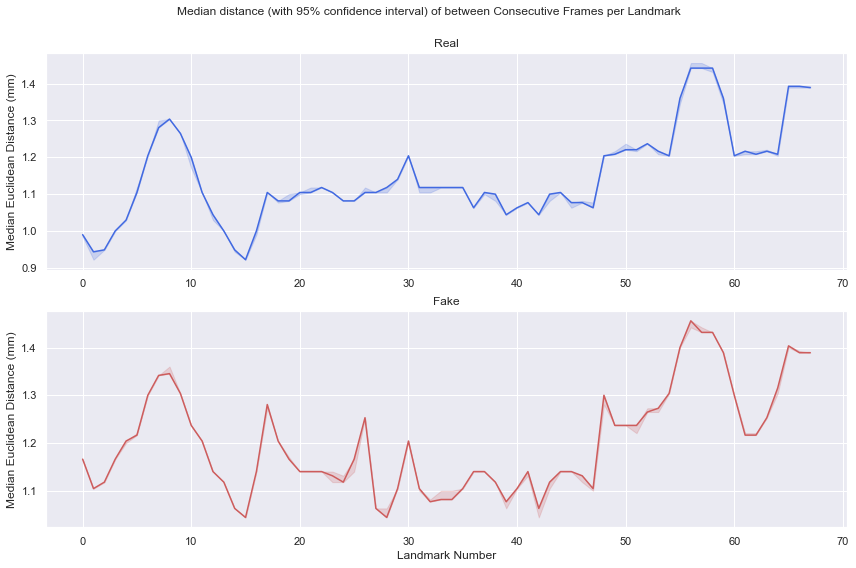

<Figure size 2160x3600 with 0 Axes>

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
plt.figure(figsize=(30,50))

ax = sns.lineplot(data=s_real, x='landmarks', y='value',  estimator=np.median,color='royalblue', markers=True, ax = axes[0])
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', estimator=np.median, color='indianred', ax=axes[1])

axes[0].set_title('Real')
axes[1].set_title('Fake')
axes[1].set(xlabel="Landmark Number", ylabel="Median Euclidean Distance (mm)", ylim=(0.9,1.5))
axes[0].set(xlabel=None, ylabel="Median Euclidean Distance (mm)")
fig.suptitle("Median distance (with 95% confidence interval) of between Consecutive Frames per Landmark")
fig.tight_layout()
fig.subplots_adjust(top=.9)

fig.savefig("figures/per_landmark_median_subplot.png", dpi=300)

<Figure size 2160x1440 with 0 Axes>

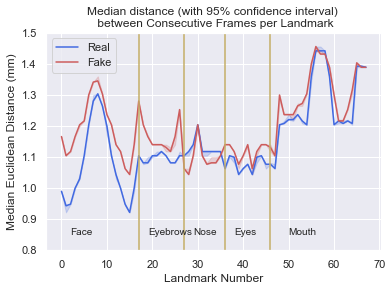

In [120]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()

ax = sns.lineplot(data=s_real, x='landmarks', y='value', color='royalblue', estimator=np.median, label='Real', markers=True)
ax1 = sns.lineplot(data=s_fake, x='landmarks', y='value', color='indianred', estimator=np.median, label='Fake')

ax.set(ylim=(0.8,1.5))
plt.ylim=(0.8,1.5)
plt.xlabel("Landmark Number")
plt.ylabel("Median Euclidean Distance (mm)")
# 1-17: face 
# 18-27: eyebrow
# 28-36: nose
# 37-46: eye
# 47-68: mouth
'''
YOU WANT AV SPAN YOU FOOL
'''
plt.annotate('Face', xy=(2,0.85))
plt.axvline(x=17,color='#C4AD66')
plt.annotate('Eyebrows', xy=(19,0.85))
plt.axvline(x=27,color='#C4AD66')
plt.annotate('Nose', xy=(29,0.85))
plt.axvline(x=36,color='#C4AD66')
plt.annotate('Eyes', xy=(38,0.85))
plt.axvline(x=46,color='#C4AD66')
plt.annotate('Mouth', xy=(50, 0.85))


plt.title("Median distance (with 95% confidence interval) \n between Consecutive Frames per Landmark")
plt.savefig("figures/per_landmark_median.png", dpi=300)
plt.show()

# What to do about outliers 
Since apparently theres a few outliers... can take the confidence into account

In [70]:
c = pd.concat([df_real,df_fake],ignore_index=True)
c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,confidence,face_id,label,landmark_0,landmark_1,landmark_10,landmark_11,landmark_12,landmark_13,landmark_14,...,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_7,y_8,y_9
0,0.98,0,REAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.7,189.7,189.6,191.3,191.7,192.1,191.2,224.4,226.2,224.3
1,0.98,0,REAL,0.984886,0.900000,1.360147,1.216553,1.044031,0.894427,0.640312,...,188.7,189.7,189.5,191.5,192.2,192.6,191.8,226.1,227.9,225.8
2,0.98,0,REAL,0.905539,0.500000,1.280625,1.280625,1.208305,0.800000,0.538516,...,188.7,189.7,189.5,191.5,192.5,192.8,191.9,225.7,227.8,226.1
3,0.98,0,REAL,0.360555,0.100000,0.412311,0.500000,0.500000,0.640312,0.500000,...,188.6,189.6,189.4,191.3,192.9,193.2,192.3,225.1,227.4,225.8
4,0.98,0,REAL,1.315295,0.905539,0.100000,0.141421,0.100000,0.000000,0.200000,...,188.7,189.6,189.4,191.1,193.0,193.4,192.6,224.9,227.3,225.7
5,0.98,0,REAL,0.100000,0.223607,0.360555,0.360555,0.412311,0.360555,0.223607,...,187.8,188.7,188.5,190.8,193.5,193.8,193.0,225.4,227.7,226.0
6,0.93,0,REAL,0.860233,0.538516,1.140175,1.208305,1.140175,1.200000,1.004988,...,187.2,188.0,187.7,190.0,192.9,193.3,192.6,225.5,227.5,225.4
7,0.98,0,REAL,0.424264,0.424264,0.921954,0.632456,0.500000,0.500000,0.583095,...,186.1,186.9,186.8,189.7,192.5,192.8,192.0,224.6,226.8,225.1
8,0.98,0,REAL,0.412311,0.424264,1.044031,0.640312,0.424264,0.282843,0.509902,...,184.8,185.6,185.4,187.9,189.9,190.2,189.5,222.8,224.9,223.4
9,0.93,0,REAL,0.640312,0.948683,1.403567,1.503330,1.513275,1.612452,1.603122,...,183.8,184.6,184.3,186.4,188.5,189.0,188.2,221.5,223.8,222.3


Text(0.5, 0, 'Confidence')

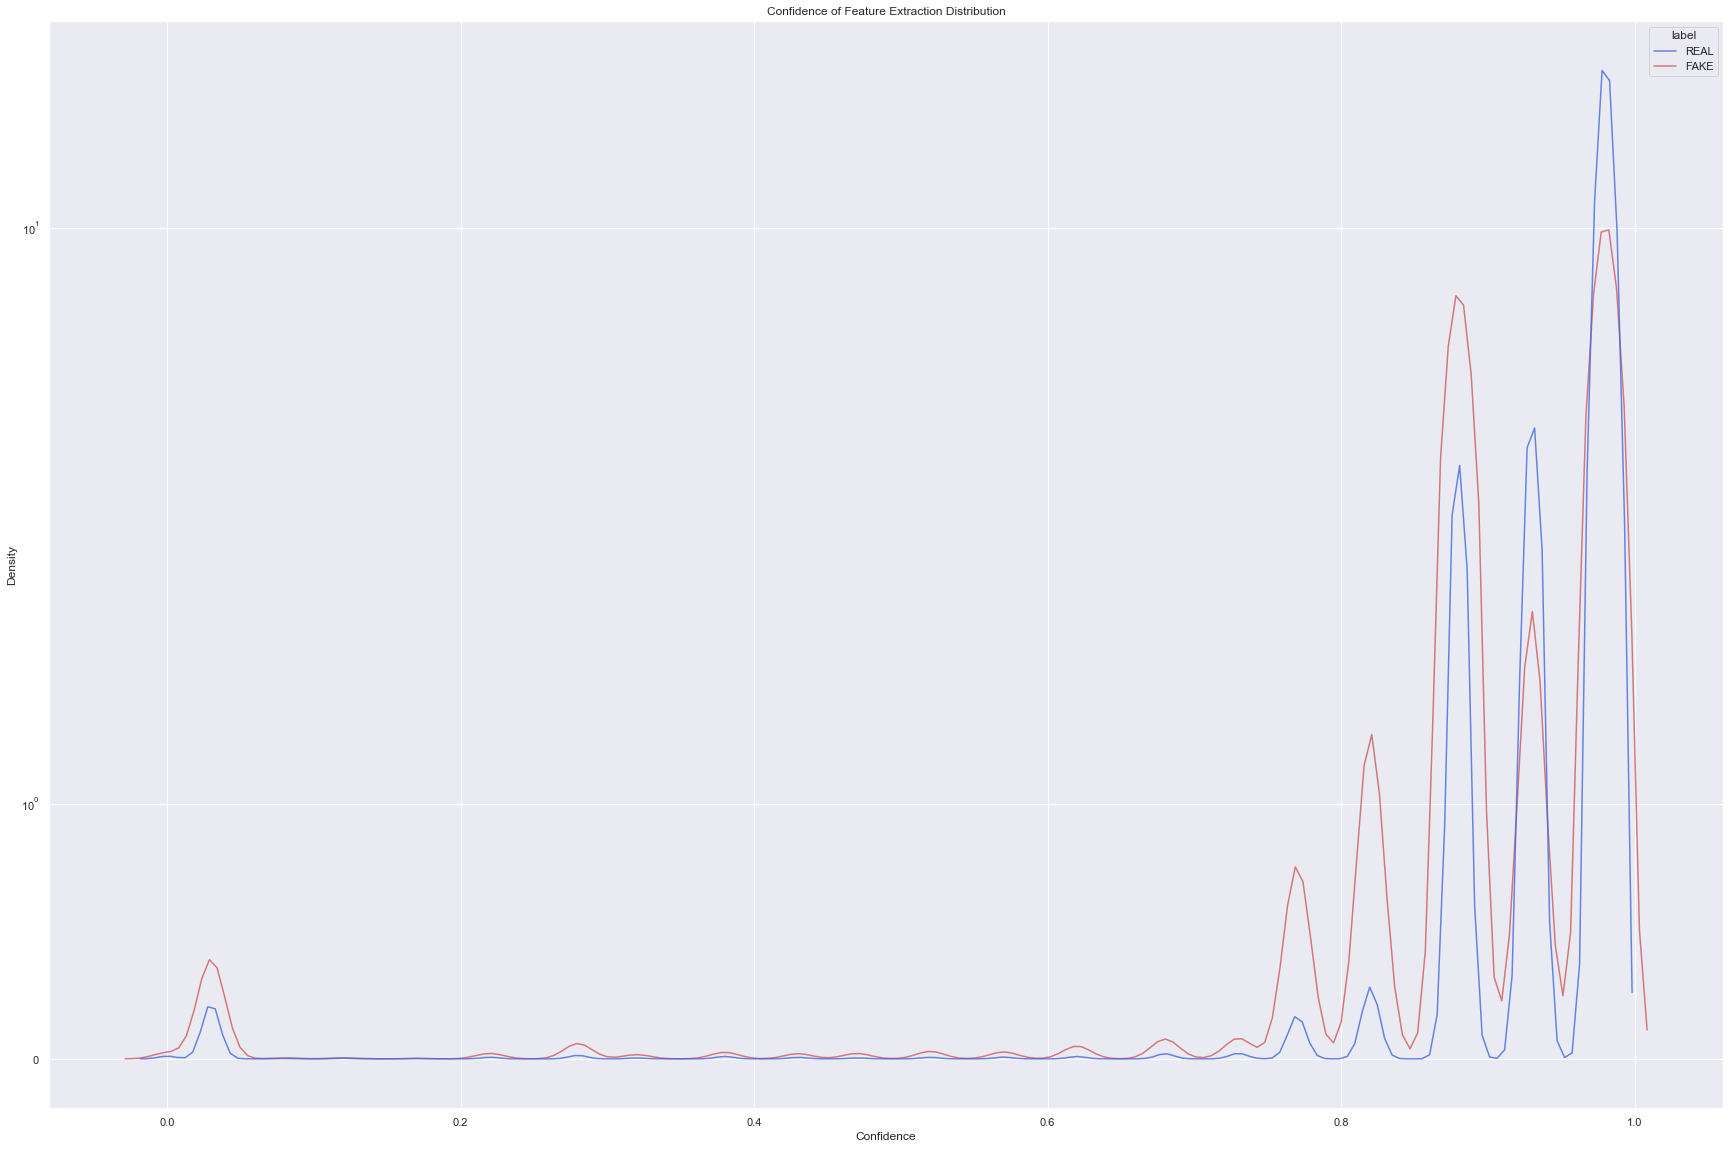

In [97]:
plt.figure(figsize=(30,20))

ax = sns.kdeplot(data=c, x='confidence',hue="label", palette={"REAL":"royalblue","FAKE":"indianred"},alpha=0.8)
plt.yscale('symlog')
plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')

In [106]:
# confidence of a frame vs avg.distance in frame?
# see if the high distances are from low confidence
c = pd.concat([df_real,df_fake]).reset_index()
c

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,filename,frame,confidence,face_id,label,landmark_0,landmark_1,landmark_10,landmark_11,landmark_12,...,y_61,y_62,y_63,y_64,y_65,y_66,y_67,y_7,y_8,y_9
0,aagumdmtjk.mp4,1,0.98,0,REAL,NaN,NaN,NaN,NaN,NaN,...,188.7,189.7,189.6,191.3,191.7,192.1,191.2,224.4,226.2,224.3
1,aagumdmtjk.mp4,2,0.98,0,REAL,0.984886,0.900000,1.360147,1.216553,1.044031,...,188.7,189.7,189.5,191.5,192.2,192.6,191.8,226.1,227.9,225.8
2,aagumdmtjk.mp4,3,0.98,0,REAL,0.905539,0.500000,1.280625,1.280625,1.208305,...,188.7,189.7,189.5,191.5,192.5,192.8,191.9,225.7,227.8,226.1
3,aagumdmtjk.mp4,4,0.98,0,REAL,0.360555,0.100000,0.412311,0.500000,0.500000,...,188.6,189.6,189.4,191.3,192.9,193.2,192.3,225.1,227.4,225.8
4,aagumdmtjk.mp4,5,0.98,0,REAL,1.315295,0.905539,0.100000,0.141421,0.100000,...,188.7,189.6,189.4,191.1,193.0,193.4,192.6,224.9,227.3,225.7
5,aagumdmtjk.mp4,6,0.98,0,REAL,0.100000,0.223607,0.360555,0.360555,0.412311,...,187.8,188.7,188.5,190.8,193.5,193.8,193.0,225.4,227.7,226.0
6,aagumdmtjk.mp4,7,0.93,0,REAL,0.860233,0.538516,1.140175,1.208305,1.140175,...,187.2,188.0,187.7,190.0,192.9,193.3,192.6,225.5,227.5,225.4
7,aagumdmtjk.mp4,8,0.98,0,REAL,0.424264,0.424264,0.921954,0.632456,0.500000,...,186.1,186.9,186.8,189.7,192.5,192.8,192.0,224.6,226.8,225.1
8,aagumdmtjk.mp4,9,0.98,0,REAL,0.412311,0.424264,1.044031,0.640312,0.424264,...,184.8,185.6,185.4,187.9,189.9,190.2,189.5,222.8,224.9,223.4
9,aagumdmtjk.mp4,10,0.93,0,REAL,0.640312,0.948683,1.403567,1.503330,1.513275,...,183.8,184.6,184.3,186.4,188.5,189.0,188.2,221.5,223.8,222.3


In [122]:
c1 = c.groupby(['filename','label','frame', ]).mean()

In [124]:
c1['landmark_mean'] = c1[landmark_cols].mean(axis=1)

<Figure size 3600x2160 with 0 Axes>

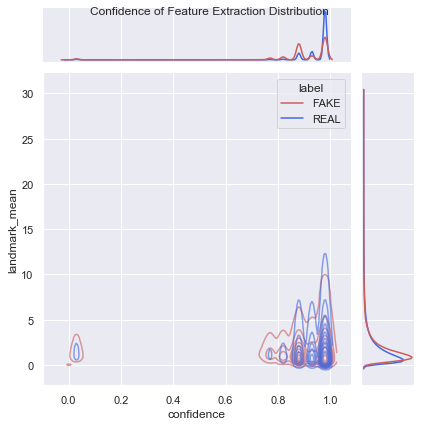

In [152]:
plt.figure(figsize=(50,30))
#confidence of outliers?
ax = sns.jointplot(data=c1[c1.landmark_mean < 30].reset_index(), x='confidence', y='landmark_mean', kind='kde', dropna=True, hue='label',
palette={"REAL":"royalblue","FAKE":"indianred"}, alpha=0.6)
#plt.yscale('symlog')
#plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')
plt.ylabel('Average Landmark Distance')
plt.suptitle("Confidence of Feature Extraction Distribution")
plt.savefig("figures/confidence_feature_joint.png", dpi=300)


<Figure size 3600x2160 with 0 Axes>

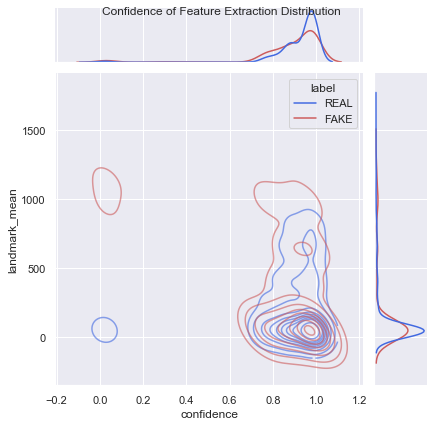

In [151]:
plt.figure(figsize=(50,30))
#confidence of outliers?
ax = sns.jointplot(data=c1[c1.landmark_mean > 30].reset_index(), x='confidence', y='landmark_mean', kind='kde', dropna=True, hue='label',
palette={"REAL":"royalblue","FAKE":"indianred"}, alpha=0.6)
#plt.yscale('symlog')
#plt.title('Confidence of Feature Extraction Distribution')
plt.xlabel('Confidence')
plt.ylabel('Average Landmark Distance')
plt.suptitle("Confidence of Feature Extraction Distribution")
plt.savefig("figures/confidence_feature_joint_outliers.png", dpi=300)


# Predict Next Landmark Distance

Have file, frame, confidence, x_0, ..., x_67, y_0, ... , y_67
want to predict for $$frame+1 | frames -> \hat{x}_0,... \hat{y}_{67}$$

1. Import the data frame
2. Split into train/test/validate 
3. Perform SVR on the landmarks 
$$ X = (x_0^0, y_0^0), (x_0^1, y_0^1) ... (x_0^{67}, y_0^{67}) $$
$$ y (X+1) = (x_1^0, y_1^0), (x_1^1, y_1^1) ... (x_1^{67}, y_1^{67})) $$

In [ ]:
df = pd.read_csv('cleaned_data.csv', index_col=['filename', 'frame'])
df.dropna(inplace=True)

In [5]:
x_feature_cols = ['x_{}'.format(i) for i in range(0,68)]
y_feature_cols = ['y_{}'.format(i) for i in range(0,68)]
feature_cols = x_feature_cols+y_feature_cols

In [ ]:
real = "zzpbsapyyf.mp4"
fake = "aaaoqepxnf.mp4"

sns.set_style("whitegrid")


fig, axes = plt.subplots(17, 4, sharex=True, figsize=(16,40))
fig.suptitle('Normalised Landmark Distance over Time - Real')

for i, ax in zip(range(68), axes.flat):
    x = df.loc[real]['x_{}'.format(i)]
    y = df.loc[real]['y_{}'.format(i)]

    x_min = x.min()
    x_max = x.max()

    y_min = y.min()
    y_max = y.max()

    x = (x-x_min)/(x_max-x_min)
    y = (y-y_min)/(y_max-y_min)
    sns.lineplot(data=x, ax=ax)
    sns.lineplot(data=y, ax=ax)
plt.show()


In [18]:
X = df[feature_cols].as_matrix()[0:len(df)-1:]
y = df[feature_cols].as_matrix()[1:len(df):]
print(X.shape, y.shape)
#convert real/fake to numbers
#labels = {"REAL":0, "FAKE":1}
#y=np.vectorize(labels.get)(y)

(1754607, 136) (1754607, 136)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_texst_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
X_train.shape

(1403685, 136)

# Alternatively... 

we can remove the build up of errors and just measure the difference and pass this to an SVM for binary classificaton 

features = [distances]

[filename, frame1: landmark0, landmark1...
           frame2: landmark0, landmark1...
           ...
           frame 300:landmark0, landmark1...
]
67 landmarks per frame 
normally 300 frames per video

If plotting distances it doesnt matter about sequential since thats already got the next frame in it! 



In [3]:
df_fake = pd.read_csv('cleaned_data_fake.csv', header=0, index_col=['filename', 'frame'])
df_real = pd.read_csv('cleaned_data_real.csv', header=0, index_col=['filename', 'frame'])


In [4]:
df = pd.concat([df_real,df_fake]).reset_index()
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]

In [5]:
df.dropna(inplace=True)

In [6]:
X = df[landmark_cols].to_numpy()
y = df['label'].to_numpy()
print(X.shape, y.shape)
#convert real/fake to numbers
labels = {"REAL":0, "FAKE":1}
y=np.vectorize(labels.get)(y)

(1773957, 68) (1773957,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [60]:
print('X Size ', X_train.shape, X_val.shape, X_test.shape)
print("Y Size ", y_train.shape, y_val.shape, y_test.shape)

X Size  (1419165, 68) (177396, 68) (177396, 68)
Y Size  (1419165,) (177396,) (177396,)


In [13]:
classifier = RandomForestClassifier(max_features='sqrt', n_estimators=128,criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=128)

In [14]:
y_pred = classifier.predict(X_val)
accuracy_score(y_val, y_pred)

0.6813513269746782

In [15]:
confusion_matrix(y_val, y_pred)

array([[56662, 28625],
       [27902, 64207]])

In [16]:
pd.Series(classifier.feature_importances_, index=landmark_cols).sort_values(ascending=False)

landmark_17    0.020535
landmark_26    0.018292
landmark_22    0.017905
landmark_21    0.017748
landmark_0     0.017636
                 ...   
landmark_63    0.012578
landmark_61    0.012387
landmark_51    0.012317
landmark_66    0.012295
landmark_62    0.011984
Length: 68, dtype: float64

In [17]:
## SAVE THE MODEL
import pickle
filename = 'random_forest.sav'
pickle.dump(classifier, open(filename, 'wb'))

## To perform classifcation over a file
- Import a new file
- Group by filename
- Classify each frame, then decide on some boundary depending on real/fake
- DONT USE THIS FILE IN FINAL TEST

In [103]:
feature_vector_length = 68
num_classes = 2

In [62]:
Y_train = to_categorical(y_train, num_classes)
Y_val = to_categorical(y_val, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [64]:
input_shape = (feature_vector_length, )

In [65]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/15
17740/17740 [==============================] - 27s 1ms/step - loss: 0.2212 - accuracy: 0.6379 - val_loss: 0.2122 - val_accuracy: 0.6586
Epoch 2/15
17740/17740 [==============================] - 26s 1ms/step - loss: 0.2139 - accuracy: 0.6573 - val_loss: 0.2117 - val_accuracy: 0.6611
Epoch 3/15
17740/17740 [==============================] - 25s 1ms/step - loss: 0.2118 - accuracy: 0.6630 - val_loss: 0.2098 - val_accuracy: 0.6666
Epoch 4/15
17740/17740 [==============================] - 26s 1ms/step - loss: 0.2106 - accuracy: 0.6663 - val_loss: 0.2107 - val_accuracy: 0.6618
Epoch 5/15
17740/17740 [==============================] - 26s 1ms/step - loss: 0.2099 - accuracy: 0.6676 - val_loss: 0.2072 - val_accuracy: 0.6681
Epoch 6/15
17740/17740 [==============================] - 25s 1ms/step - loss: 0.2094 - accuracy: 0.6689 - val_loss: 0.2074 - val_accuracy: 0.6690
Epoch 7/15
17740/17740 [==============================] - 25s 1ms/step - loss: 0.2089 - accuracy: 0.6700 - val_loss: 0

In [66]:
val_results = model.evaluate(X_val, Y_val, verbose=1)
print(f'Val Results - Loss: {val_results[0]} - Accuracy: {val_results[1]}%')

5544/5544 [==============================] - 4s 714us/step - loss: 0.2035 - accuracy: 0.6766
Val Results - Loss: 0.20347976684570312 - Accuracy: 0.6765710711479187%


In [74]:
predicted = model.predict(X_val)

In [87]:
prediction = pd.DataFrame({'predicted': predicted[:,1], 'truth' : y_val})

<AxesSubplot:xlabel='truth', ylabel='predicted'>

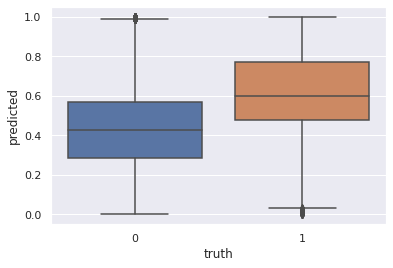

In [89]:
sns.boxplot(data = prediction, x='truth', y='predicted')

In [67]:
# Save Model
model.save('model.h5')

In [ ]:
load_model = load_model('model.h5')

### Import A new File to test on

In [36]:
df_val = pd.concat(pd.read_csv(f, header=0, index_col=['filename', 'frame']) for f in glob.glob('dataset/cleaned_data/file_12_*.csv'))

In [38]:
df_val.sort_index(level=['filename', 'frame'], inplace=True)

In [44]:
# Turn df_val into distances between frames
for i in range(0,68):
    #points = ['x_{}'.format(i), 'y_{}'.format(i)]
    #df_fake['landmark_{}'.format(i)] = df_fake[points].values.tolist()
    #df_fake = df_fake.drop([points[0], points[1]], axis=1)
    x = df_val.groupby('filename')['x_{}'.format(i)].diff()
    y = df_val.groupby('filename')['y_{}'.format(i)].diff()
    df_val['landmark_{}'.format(i)] = np.sqrt(x**2 + y**2)
df_val

confidence  face_id    x_0    x_1    x_2    x_3    x_4  \
filename       frame                                                           
aamrbolklk.mp4 1            0.98        0  429.4  430.2  432.6  435.9  442.3   
               2            0.98        0  429.2  430.3  432.8  436.1  442.1   
               3            0.98        0  429.1  430.1  432.5  435.7  441.6   
               4            0.98        0  428.5  429.5  431.9  435.3  441.3   
               5            0.98        0  427.9  429.1  431.6  434.8  440.7   
...                          ...      ...    ...    ...    ...    ...    ...   
zzrgdemacp.mp4 296          0.98        0  724.3  721.3  722.0  726.7  735.8   
               297          0.98        0  723.5  720.6  721.5  726.3  735.6   
               298          0.98        0  722.4  719.7  720.9  726.2  736.0   
               299          0.98        0  722.0  719.2  720.3  726.0  736.4   
               300          0.98        0  720.4  717.8  718.9  725.2  736.3   

                        x_5    x_6    x_7  ...  landmark_58  landmark_59  \
filename       frame                       ...                             
aamrbolklk.mp4 1      453.4  468.0  485.3  ...          NaN          NaN   
               2      452.6  467.2  484.8  ...     0.360555     0.360555   
               3      452.1  466.6  484.1  ...     3.178050     3.080584   
               4      451.9  466.2  483.5  ...     1.360147     1.252996   
               5      451.3  465.5  482.9  ...     0.781025     0.200000   
...                     ...    ...    ...  ...          ...          ...   
zzrgdemacp.mp4 296    750.7  768.9  791.6  ...     7.134424     5.192302   
               297    750.7  768.8  791.5  ...     0.854400     1.019804   
               298    751.5  770.3  793.5  ...     3.671512     2.952965   
               299    752.7  772.0  796.0  ...     3.466987     2.692582   
               300    753.4  772.3  795.9  ...     3.125700     2.549510   

                      landmark_60  landmark_61  landmark_62  landmark_63  \
filename       frame                                                       
aamrbolklk.mp4 1              NaN          NaN          NaN          NaN   
               2         0.316228     0.223607     0.100000     0.141421   
               3         2.280351     1.389244     0.860233     0.707107   
               4         1.414214     1.562050     1.720465     1.886796   
               5         1.044031     1.708801     1.746425     1.700000   
...                           ...          ...          ...          ...   
zzrgdemacp.mp4 296       0.894427     0.860233     0.781025     0.781025   
               297       1.300000     1.923538     1.802776     1.700000   
               298       1.984943     1.392839     1.552417     1.627882   
               299       1.004988     1.802776     1.562050     1.131371   
               300       1.431782     1.063015     0.806226     0.670820   

                      landmark_64  landmark_65  landmark_66  landmark_67  
filename       frame                                                      
aamrbolklk.mp4 1              NaN          NaN          NaN          NaN  
               2         0.282843     0.141421     0.100000     0.316228  
               3         1.749286     2.701851     2.765863     2.954657  
               4         1.526434     1.627882     1.456022     1.360147  
               5         1.562050     0.943398     0.921954     0.707107  
...                           ...          ...          ...          ...  
zzrgdemacp.mp4 296       1.077033     5.500909     5.707889     5.632051  
               297       1.360147     1.104536     1.004988     1.019804  
               298       1.878829     3.982462     4.114608     4.031129  
               299       2.816026     2.459675     2.580698     2.720294  
               300       1.400000     1.897367     2.102380     2.236068  

[665544 rows x 207 columns]

In [2]:
df_val.to_csv('cleaned_data_val.csv', header=df_val.columns, index=['filename','frame'])

NameError: name 'df_val' is not defined

In [90]:
df_val = pd.read_csv('cleaned_data_val.csv', header=0, index_col=['filename', 'frame'])
df_val.dropna(inplace=True)

In [91]:
landmark_cols = ['landmark_{}'.format(i) for i in range(68)]

In [92]:
df_val_copy = df_val[landmark_cols]

In [93]:
x_lst_val = df_val_copy.to_numpy()

In [94]:
predict_val = model.predict(x_lst_val)

In [95]:
df_val['prediction'] = predict_val[:,1]

In [98]:
df_val_copy = df_val[['confidence'] + landmark_cols +['label','prediction']]
df_val_copy

confidence  landmark_0  landmark_1  landmark_2  \
filename       frame                                                   
aamrbolklk.mp4 2            0.98    1.216553    1.204159    1.019804   
               3            0.98    1.004988    0.728011    0.670820   
               4            0.98    1.992486    1.708801    1.523155   
               5            0.98    1.341641    1.077033    0.948683   
               6            0.98    1.726268    1.603122    1.513275   
...                          ...         ...         ...         ...   
zzrgdemacp.mp4 296          0.98    1.431782    1.204159    1.170470   
               297          0.98    1.063015    1.063015    1.029563   
               298          0.98    1.941649    1.664332    1.166190   
               299          0.98    2.039608    1.772005    1.708801   
               300          0.98    2.408319    2.280351    2.607681   

                      landmark_3  landmark_4  landmark_5  landmark_6  \
filename       frame                                                   
aamrbolklk.mp4 2        0.728011    0.632456    0.854400    0.854400   
               3        0.806226    0.943398    1.118034    1.523155   
               4        1.264911    1.140175    1.118034    1.077033   
               5        0.943398    1.000000    1.000000    1.140175   
               6        1.303840    1.513275    1.627882    1.941649   
...                          ...         ...         ...         ...   
zzrgdemacp.mp4 296      1.004988    0.860233    1.170470    1.700000   
               297      0.894427    0.632456    0.500000    0.509902   
               298      1.004988    1.170470    1.612452    2.343075   
               299      1.513275    1.360147    1.920937    2.475884   
               300      2.624881    2.202272    2.024846    1.431782   

                      landmark_7  landmark_8  ...  landmark_60  landmark_61  \
filename       frame                          ...                             
aamrbolklk.mp4 2        1.029563    1.315295  ...     0.316228     0.223607   
               3        1.838478    1.868154  ...     2.280351     1.389244   
               4        1.166190    1.500000  ...     1.414214     1.562050   
               5        1.000000    0.860233  ...     1.044031     1.708801   
               6        2.308679    2.284732  ...     1.878829     1.992486   
...                          ...         ...  ...          ...          ...   
zzrgdemacp.mp4 296      2.009975    2.353720  ...     0.894427     0.860233   
               297      0.608276    0.806226  ...     1.300000     1.923538   
               298      3.047950    3.114482  ...     1.984943     1.392839   
               299      3.264966    3.405877  ...     1.004988     1.802776   
               300      1.603122    2.353720  ...     1.431782     1.063015   

                      landmark_62  landmark_63  landmark_64  landmark_65  \
filename       frame                                                       
aamrbolklk.mp4 2         0.100000     0.141421     0.282843     0.141421   
               3         0.860233     0.707107     1.749286     2.701851   
               4         1.720465     1.886796     1.526434     1.627882   
               5         1.746425     1.700000     1.562050     0.943398   
               6         1.897367     1.868154     1.360147     1.389244   
...                           ...          ...          ...          ...   
zzrgdemacp.mp4 296       0.781025     0.781025     1.077033     5.500909   
               297       1.802776     1.700000     1.360147     1.104536   
               298       1.552417     1.627882     1.878829     3.982462   
               299       1.562050     1.131371     2.816026     2.459675   
               300       0.806226     0.670820     1.400000     1.897367   

                      landmark_66  landmark_67  label  prediction  
filename       frame                                           

In [99]:
labels = {"REAL":0, "FAKE":1}
y=np.vectorize(labels.get)(df_val['label'])

In [104]:
fpr, tpr, t = metrics.roc_curve(y, predict_val[:,1])
metrics.auc(fpr, tpr)

0.6314957421483005

<AxesSubplot:xlabel='prediction', ylabel='label'>

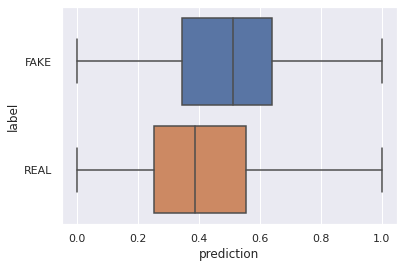

In [114]:
sns.boxplot(data = df_val_copy, y='label', x='prediction')

<AxesSubplot:xlabel='frame', ylabel='prediction'>

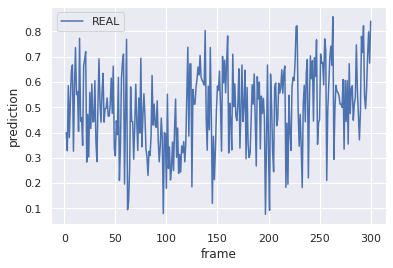

In [107]:
# for each file (pick real or fake)
# plot x=frame, y=prediction
test = df_val_copy[df_val_copy.index.get_level_values('filename').str.startswith('acrmwhpkcd.mp4')].reset_index() #zyowzrcpck.mp4 
sns.lineplot(data=test, x='frame', y='prediction', label='REAL')

<AxesSubplot:xlabel='frame', ylabel='prediction'>

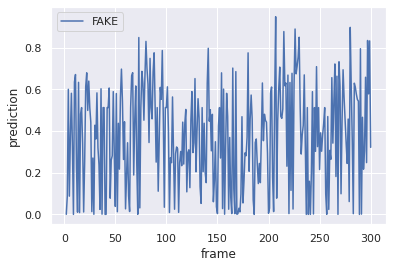

In [110]:
# for each file (pick real or fake)
# plot x=frame, y=prediction
test = df_val_copy[df_val_copy.index.get_level_values('filename').str.startswith('zzrgdemacp.mp4')].reset_index() #zzrgdemacp aamrbolklk
sns.lineplot(data=test, x='frame', y='prediction', label='FAKE')

<Figure size 2160x1440 with 0 Axes>

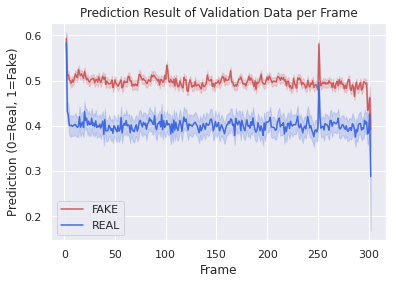

In [119]:
# y = average distance of all landmarks, x = frame
d_fake = df_val_copy[df_val_copy.label == 'FAKE'].reset_index()
d_real = df_val_copy[df_val_copy.label == 'REAL'].reset_index()

plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.lineplot(data=d_fake, x='frame', y='prediction', label='FAKE', markers=True, color='indianred')
ax1 = sns.lineplot(data=d_real, x='frame', y='prediction', label='REAL', color='royalblue')
plt.title('Prediction Result of Validation Data per Frame')
plt.xlabel('Frame')
plt.ylabel('Prediction (0=Real, 1=Fake)')
plt.savefig("figures/prediction_values.png", dpi=300)

In [128]:
df_val_copy['binary_label'] = np.vectorize(labels.get)(df_val['label'])

/tmp/ipykernel_43284/898424682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_copy['binary_label'] = np.vectorize(labels.get)(df_val['label'])


<Figure size 2160x1440 with 0 Axes>

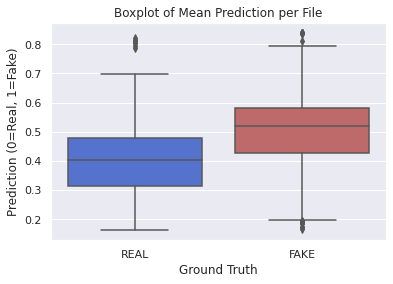

In [158]:
test = df_val_copy.groupby('filename').mean()[['prediction','binary_label']]
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.boxplot(data=test, x='binary_label', y='prediction', palette={1:'indianred', 0:'royalblue'})
ax.set_xticks(range(2))
ax.set_xticklabels(['REAL', 'FAKE'])
plt.title('Boxplot of Mean Prediction per File')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction (0=Real, 1=Fake)')
plt.savefig("figures/mean_boxplot_prediction_values.png", dpi=300)

<Figure size 2160x1440 with 0 Axes>

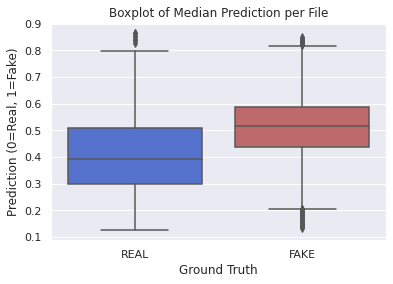

In [159]:
test = df_val_copy.groupby('filename').median()[['prediction','binary_label']]
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
ax= sns.boxplot(data=test, x='binary_label', y='prediction', palette={1:'indianred', 0:'royalblue'})
ax.set_xticks(range(2))
ax.set_xticklabels(['REAL', 'FAKE'])
plt.title('Boxplot of Median Prediction per File')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction (0=Real, 1=Fake)')
plt.savefig("figures/median_boxplot_prediction_values.png", dpi=300)

<AxesSubplot:xlabel='confidence', ylabel='prediction'>

/home/kyralm/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


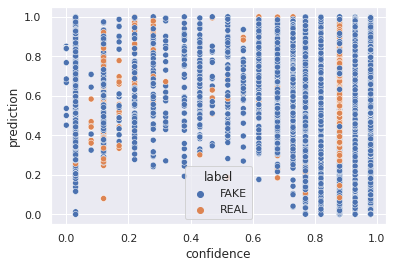

In [162]:
sns.scatterplot(data=df_val, y='prediction', x='confidence', hue='label')

## Give our SVM a series of predictions PER file

then it'll define the boundary between real/fake
So I need to redo the training on just the dataframe so we have values per file and can group...

In [16]:
df_fake = pd.read_csv('cleaned_data_fake.csv', header=0, index_col=['filename', 'frame'])
df_real = pd.read_csv('cleaned_data_real.csv', header=0, index_col=['filename', 'frame'])
df = pd.concat([df_real,df_fake]).reset_index()
df.dropna(inplace=True)
landmark_cols = ['landmark_{}'.format(i) for i in range(0,68)]

In [17]:
# Need to some of the dataset so that some goes to DL and some for the SVM
# X.shape, y.shape, df.shape -> ((1773957, 68), (1773957,), (1773957, 209))
# Split at 
# Need to sort so its p even split
df = df.sort_values(by=['filename', 'frame']).reset_index(drop=True)

In [63]:
files = df.groupby('filename').size()
total_files = len(files)
split_on = files.index[int(0.5*total_files)]
split_on

'nbbxssrkhg.mp4'

In [64]:
split_index = df.loc[(df['filename']==split_on)].head(1).index[0]
split_index

885825

In [65]:
df_mlp = df[:split_index]
df_mlp_predict = df[split_index::]

In [66]:
X_1 = df_mlp[landmark_cols].to_numpy()
X_2 = df_mlp_predict[landmark_cols].to_numpy()

#convert real/fake to numbers
labels = {"REAL":0, "FAKE":1}
y_1 = df_mlp['label'].to_numpy()
y_1=np.vectorize(labels.get)(y_1)


y_2 = df_mlp_predict['label'].to_numpy()
df_mlp_predict['binary_label'] = np.vectorize(labels.get)(y_2)
y_2 = np.array(list(df_mlp_predict.groupby(['filename']).binary_label.max()))

print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)


(885825, 68) (885825,)
(888132, 68) (3000,)


/tmp/ipykernel_49109/399520656.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlp_predict['binary_label'] = np.vectorize(labels.get)(y_2)


In [67]:
feature_vector_length = 68
num_classes = 2
input_shape = (feature_vector_length, )
print(f'Feature Shape: {input_shape}')

Feature Shape: (68,)


In [68]:
Y_train = to_categorical(y_1, num_classes)

In [69]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
model.fit(X_1, Y_train, epochs=15, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2256 - accuracy: 0.6228 - val_loss: 0.2166 - val_accuracy: 0.6527
Epoch 2/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2161 - accuracy: 0.6522 - val_loss: 0.2134 - val_accuracy: 0.6570
Epoch 3/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2141 - accuracy: 0.6566 - val_loss: 0.2116 - val_accuracy: 0.6623
Epoch 4/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2127 - accuracy: 0.6599 - val_loss: 0.2114 - val_accuracy: 0.6584
Epoch 5/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2118 - accuracy: 0.6615 - val_loss: 0.2098 - val_accuracy: 0.6659
Epoch 6/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2111 - accuracy: 0.6639 - val_loss: 0.2091 - val_accuracy: 0.6665
Epoch 7/15
11073/11073 [==============================] - 16s 1ms/step - loss: 0.2102 - accuracy: 0.6657 - val_loss: 0

In [70]:
model.save('model.h5')

In [25]:
model = load_model('model.h5')

In [71]:
predicted = model.predict(X_2, verbose=1)

27755/27755 [==============================] - 19s 672us/step


In [72]:
df_mlp_predict['prediction'] = predicted[:,1]

/tmp/ipykernel_49109/1655737660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlp_predict['prediction'] = predicted[:,1]


In [73]:
n_max = df_mlp_predict.groupby('filename').size().max()

In [74]:
svm_input = np.array(list(df_mlp_predict.groupby('filename').prediction.agg(list).apply(lambda x: np.pad(array=x, pad_width=(0,n_max-len(x)), mode='median'))))

In [75]:
svm_input.shape, y_2.shape

((3000, 300), (3000,))

In [76]:
classifier = svm.SVC(kernel='rbf')
classifier.fit(svm_input, y_2)

SVC()

In [77]:
df_val = pd.read_csv('cleaned_data_val.csv', header=0, index_col=['filename', 'frame'])
df_val.dropna(inplace=True)

In [36]:
X_val = df_val[landmark_cols].to_numpy()

#convert real/fake to numbers
y_val = df_val['label'].to_numpy()
df_val['binary_label'] = np.vectorize(labels.get)(y_val)
y_val = np.array(list(df_val.groupby(['filename']).binary_label.max()))

print(X_val.shape, y_val.shape)


(663319, 68) (2225,)


In [78]:
val_predicted = model.predict(X_val, verbose=1)

20729/20729 [==============================] - 12s 598us/step


In [79]:
df_val['prediction'] = val_predicted[:,1]

In [80]:
df_val = df_val.reset_index()[df_val.reset_index().frame < 301]

In [81]:
df_val = df_val.set_index(['filename', 'frame'])

In [82]:
svm_input = np.array(list(df_val.groupby('filename').prediction.agg(list).apply(lambda x: np.pad(array=x, pad_width=(0,300-len(x)), mode='median'))))

In [83]:
y_pred = classifier.predict(svm_input)

In [84]:
y_val

array([1, 1, 1, ..., 0, 1, 1])

In [85]:
accuracy_score(y_val, y_pred)

0.52